In [1]:
import numpy as np
#PRN assignments for each satellite specs 
#Specifies the points to be tapped on G2 register
SV = np.array([
   [2,6],
   [3,7],
   [4,8],
   [5,9],
   [1,9],
   [2,10],
   [1,8],
   [2,9],
   [3,10],
   [2,3],
   [3,4],
   [5,6],
   [6,7],
   [7,8],
   [8,9],
   [9,10],
   [1,4],
   [2,5],
   [3,6],
   [4,7],
   [5,8],
   [6,9],
   [1,3],
   [4,6],
   [5,7],
   [6,8],
   [7,9],
   [8,10],
   [1,6],
   [2,7],
   [3,8],
   [4,9],
])

In [2]:
def shift(register, taps, output):    
    out = 0
    for i in range(len(output)): out^=register[output[i]-1]
    fb=0
    for i in range(len(taps)): fb^=register[taps[i]-1]
    # shift to the right
    for i in reversed(range(len(register)-1)): 
        register[i+1] = register[i]
        
    # put feedback in position 1
    register[0] = fb
    return out,register

In [10]:

def PRN(sat_num,num_bits=1023):
        #Initialise G1, G2 
    G1 = np.ones(10,dtype=np.int64)
    G2 = np.ones(10,dtype=np.int64)
    ca = []
    for i in range(num_bits):
        g1,G1 = shift(G1, [3,10], [10])          #feedback 3,10, output 10
        g2,G2 = shift(G2, [2,3,6,8,9,10],SV[sat_num-1]) #feedback 2,3,6,8,9,10, output 2,6 for sat 1
        ca.append(g1^g2)
    return np.array(ca)



In [20]:
# find ca code for sat 24, and make 0 into -1 to use in BPSK
d = PRN(24,200)
sat_24 = 2*d-1

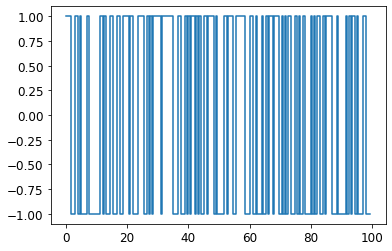

In [21]:
import matplotlib.pyplot as plt
plt.step(np.arange(sat_24.shape[0])/2,sat_24)
plt.show()